<a href="https://colab.research.google.com/github/Aarthi07-hub/Bharat-Intern-Task-01/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [7]:
df = pd.read_csv('/content/sms classifier.csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [8]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [9]:
spam_messages = df[df["type"]=="spam"]
spam_messages.head()

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


In [10]:
spam_messages.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


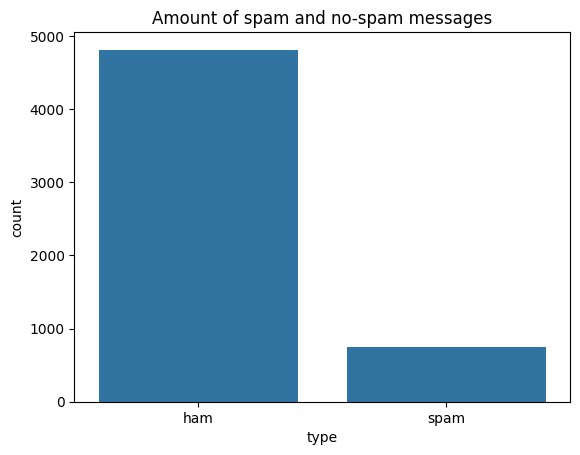

In [11]:
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [14]:
data_train, data_test, labels_train, labels_test = train_test_split(df.text,df.type,test_size=0.2,random_state=0)
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (4447,) (4447,)
data_test, labels_test:  (1112,) (1112,)


In [15]:
vectorizer = CountVectorizer()
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

In [17]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [18]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9901079136690647


In [19]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[979   0]
 [ 11 122]]


In [20]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       979
        spam       1.00      0.92      0.96       133

    accuracy                           0.99      1112
   macro avg       0.99      0.96      0.98      1112
weighted avg       0.99      0.99      0.99      1112

